# Importing libraries  

In [63]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

# Loading the training and testing dataset

In [64]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [65]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train_df.shape

(891, 12)

In [67]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
test_df.shape

(418, 11)

Note that the 'Survival' column is missing from the test dataset. So, we have to predict that column using the logistic regression algorithm

# Data Quality and Missing value assessment

In the given data, there might be the case that all the data is not provided by the passengers while booking the ticket. We will have to analyse it and take the decision to reassign the NaN value or drop the column completely in case of inconsistent data 

### Missing values in "Age" Column

In [69]:
#check the missing values in the train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
#percent of missing "Age"
print('The percent of missing "Age" data is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100) )

The percent of missing "Age" data is 19.87%


So, 20% of Age data is missing. Now let us see what "Age" variable looks like. 

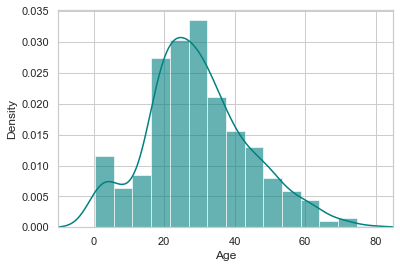

In [71]:
ax=train_df["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df["Age"].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [72]:
print('The mean "Age" is %0.2f' %(train_df["Age"].mean(skipna=True)))
print('The mean "Age" is %0.2f' %(train_df["Age"].median(skipna=True)))

The mean "Age" is 29.70
The mean "Age" is 28.00


### Missing values in "Cabin" Column

In [73]:
#percent of missing "Cabin"
print('The percent of missing "Cabin" data is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100) )

The percent of missing "Cabin" data is 77.10%


Since 77% of the data is missing, it can be reasonable to drop the "Cabin" column

### Missing values in "Embarked" Column

In [74]:
 #percent of missing "Embarked"
print('The percent of missing "Cabin" data is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100) )

The percent of missing "Cabin" data is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


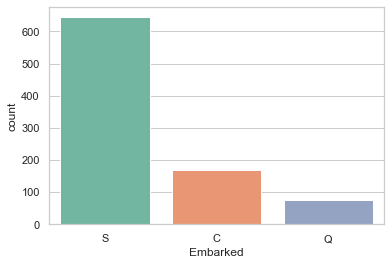

In [75]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')

print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train_df,palette='Set2')
plt.show()

In [76]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [77]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [78]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


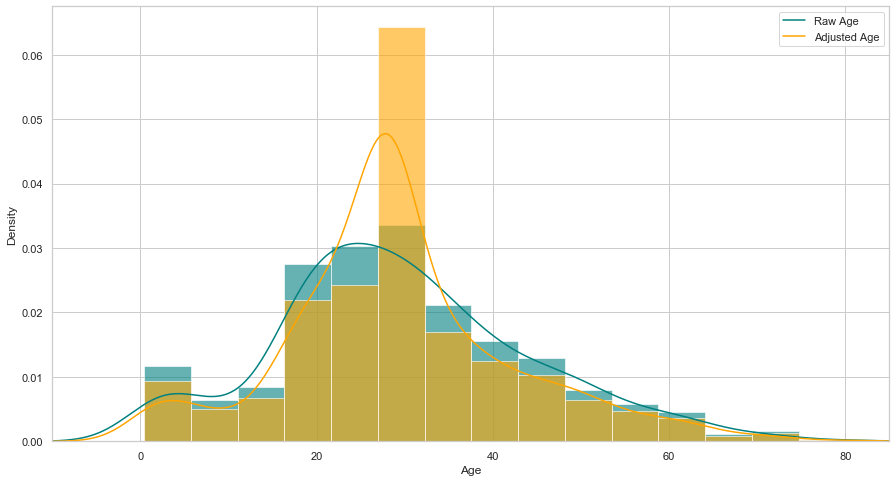

In [79]:
plt.figure(figsize=(15,8))
ax=train_df["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df["Age"].plot(kind='density',color='teal')
ax=train_data["Age"].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.6)
train_data["Age"].plot(kind='density',color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

In [80]:
tm = train_data.groupby("Survived").mean()
tm


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408


In [81]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

PassengerId    0.002971
Pclass         0.129755
Age            0.029781
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

We do not need the columns with lesser value. So we drop the additional columns

In [82]:
train_data = train_data.drop(["PassengerId","Name","Ticket"], axis=1)

In [83]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [84]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [90]:
#get categorical variables and drop some variables
training = pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"])
training.drop("Sex_female",axis=1,inplace=True)
final_train=training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


# Repeating the same for test dataset

In [91]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# Data Exploration

### Exploration of Age

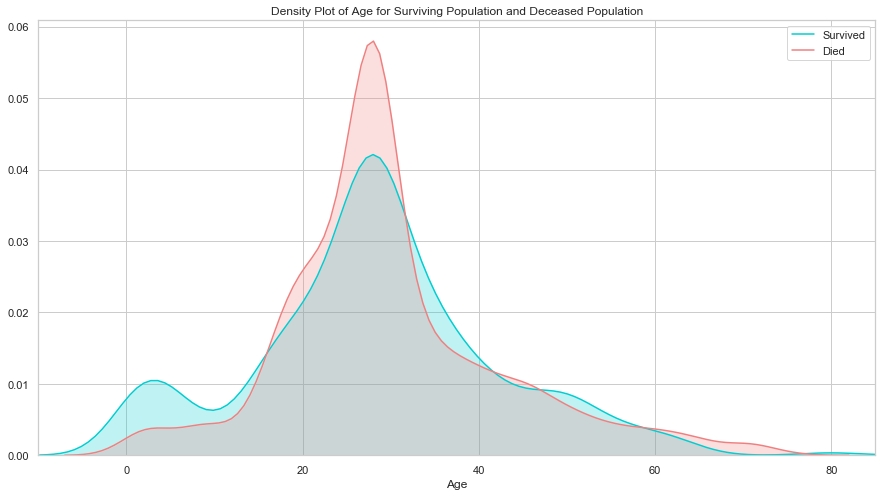

In [95]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train["Age"][final_train.Survived==1],color="darkturquoise",shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived==0],color="lightcoral", shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

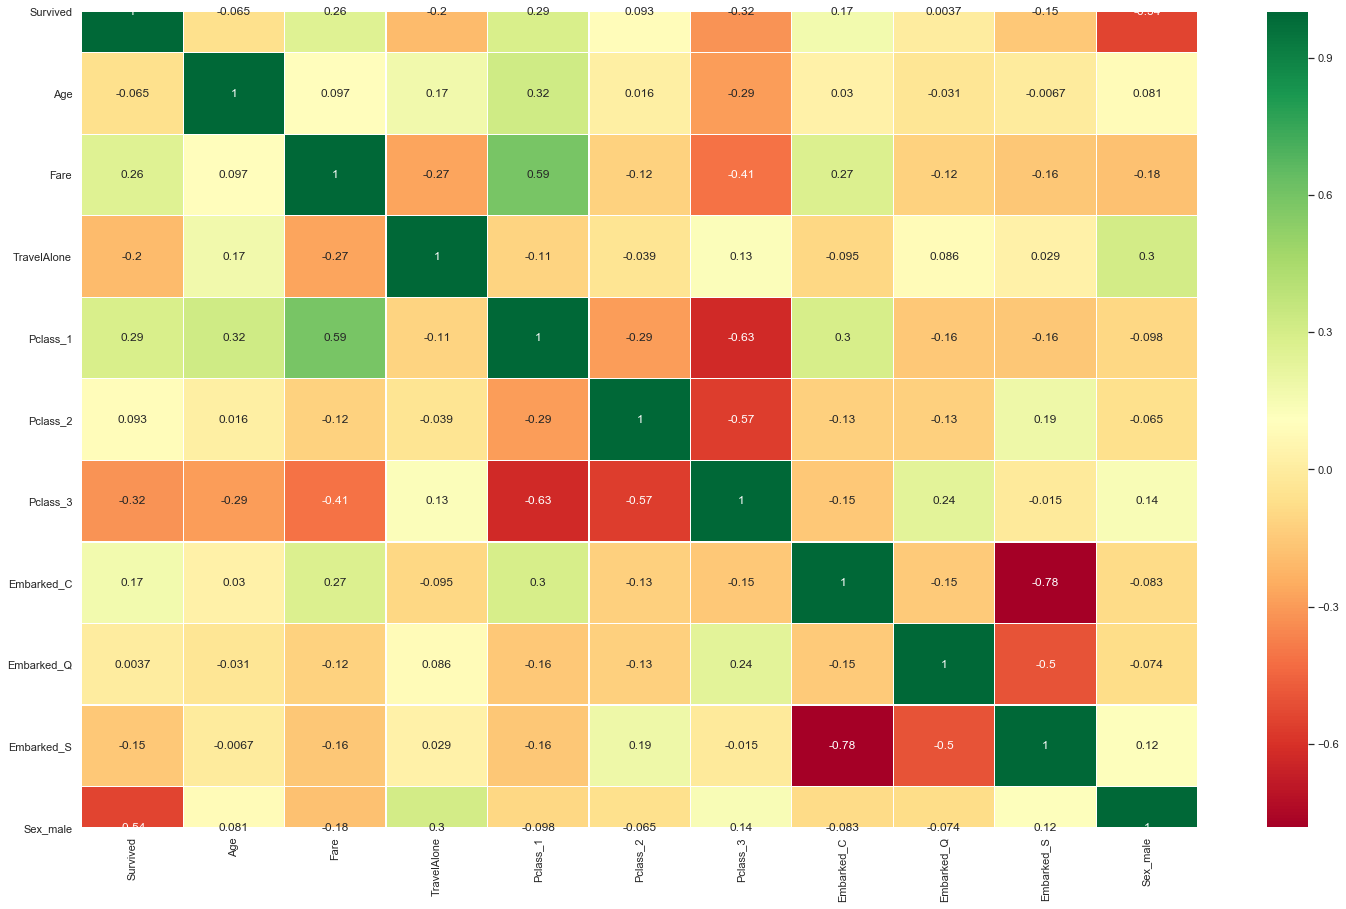

In [96]:
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

# Training and testing the model using Logistic Regression

In [97]:
#import logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction


In [99]:
X=final_train.drop(['Survived'],axis=1)
y=final_train['Survived']

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [110]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
print(model.score(X_test,y_test))

0.8268156424581006


In [112]:
pp = model.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

Survived 61
NOT Survived 118


array([[102,  15],
       [ 16,  46]], dtype=int64)

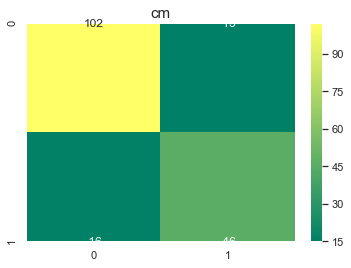

In [114]:
cm = confusion_matrix(y_test,pp)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pp),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

In [115]:
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.68
